In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from numpy.random import randn
import matplotlib.pyplot as plt
import random
import re

In [3]:
house_data=pd.read_csv('E:\数据分析\py\数据分析实例\sh_second_hand_housing\数据爬虫程序\house_data.csv',index_col=0)


In [4]:
house_data.head()

,title,name,district,total_price,price,house_type,floor_loc,house_area,house_struc,real_area,archi_cate,house_toward,archi_struc,deco_condition,elevator_rate,elevator_equip
0,新上房源 精装修 不靠高架 近地铁一号线 诚意出售,花苑村玉兰园二手房,徐汇二手房,220.0,56981元/平米,1室1厅1厨1卫,高楼层 (共6层),38.61㎡,平层,暂无数据,板楼,南,砖混结构,精装,一梯四户,无
1,售后公房，满五唯一，南北通全明户型，小区中间，求知,龙吴路13弄二手房,徐汇二手房,382.0,63287元/平米,2室1厅1厨1卫,低楼层 (共6层),60.36㎡,平层,50.46㎡,板楼,西南,砖混结构,简装,一梯四户,无
2,南北通飞机户型，满五唯一精装修 ，一梯二户高得房率,虹叶茗园二手房,虹口二手房,978.0,84852元/平米,2室2厅1厨2卫,低楼层 (共22层),115.26㎡,平层,暂无数据,板楼,南,钢混结构,精装,一梯两户,有
3,高层电梯房、户型正气、精装修、无增值税、诚意出售,清涧三街坊二手房,普陀二手房,360.0,45329元/平米,2室1厅1厨1卫,中楼层 (共24层),79.42㎡,平层,暂无数据,塔楼,南 北,钢混结构,精装,两梯八户,有
4,95年房龄+地铁口+精装修+边套全明+满五唯一+红旗,纪念小区二手房,虹口二手房,420.0,51458元/平米,2室1厅1厨1卫,低楼层 (共6层),81.62㎡,平层,暂无数据,板楼,南 北,砖混结构,精装,一梯四户,无


In [5]:
house_data['district'].isnull().sum()

0

In [6]:
#数据规整
#district列规整，保留字符串前两位
district=house_data['district']
li=[]
for i in district:
    i=i[:2]
    li.append(i)
house_data['district']=Series(li)

In [7]:
house_data['district'].isnull().sum()

0

In [8]:
house_data['price'].isnull().sum()

0

In [9]:
#price列规整，保留数字部分
price=house_data['price']
price_temp=[]
for i in price:#提取出数字单价
    price_temp.extend(re.findall('[0-9]+',i))
price_temp_int=[]
for i in price_temp:#将字符型数字转为整型数字
    price_temp_int.append(int(i))
house_data['price']=Series(price_temp_int)

In [10]:
house_data['price'].isnull().sum()

0

In [11]:
house_data['house_area'].isnull().sum()

0

In [12]:
#house_area列规整，保留数字部分
house_area=house_data['house_area']
house_area_temp=[]
for i in house_area:
    house_area_temp.extend(re.findall('[0-9]+\.[0-9]+|[0-9]+',i))

In [13]:
house_area_temp_float=[]
for i in house_area_temp:
    house_area_temp_float.append(float(i))
house_area=Series(house_area_temp_float) 
house_data['house_area']=house_area

In [14]:
#对house_struc户型结构列进行规整
#设置暂无数据为0，平层为1，复式为2，错层为3，跃层为4
house_data.loc[house_data['house_struc']=='暂无数据','house_struc']=0
house_data.loc[house_data['house_struc']=='平层','house_struc']=1
house_data.loc[house_data['house_struc']=='复式','house_struc']=2
house_data.loc[house_data['house_struc']=='错层','house_struc']=3
house_data.loc[house_data['house_struc']=='跃层','house_struc']=4


In [15]:
#对archi_cate建筑类型列进行规整
#设置暂无数据为0，板楼为1，塔楼为2，板塔结合为3，平房为4
house_data.loc[house_data['archi_cate']=='暂无数据','archi_cate']=0
house_data.loc[house_data['archi_cate']=='板楼','archi_cate']=1
house_data.loc[house_data['archi_cate']=='塔楼','archi_cate']=2
house_data.loc[house_data['archi_cate']=='板塔结合','archi_cate']=3
house_data.loc[house_data['archi_cate']=='平房','archi_cate']=4

In [16]:
#对archi_struc建筑结构列进行规整
#设置未知结构为0，砖混结构为1，钢混结构为2，混合结构为3，框架结构为4，砖木结构为5
house_data.loc[house_data['archi_struc']=='未知结构','archi_struc']=0
house_data.loc[house_data['archi_struc']=='砖混结构','archi_struc']=1
house_data.loc[house_data['archi_struc']=='钢混结构','archi_struc']=2
house_data.loc[house_data['archi_struc']=='混合结构','archi_struc']=3
house_data.loc[house_data['archi_struc']=='框架结构','archi_struc']=4
house_data.loc[house_data['archi_struc']=='砖木结构','archi_struc']=5

In [17]:
#对deco_condition列进行规整
#设置其他为0，精装为1，简装为2，毛坯为3
house_data.loc[house_data['deco_condition']=='其他','deco_condition']=0
house_data.loc[house_data['deco_condition']=='精装','deco_condition']=1
house_data.loc[house_data['deco_condition']=='简装','deco_condition']=2
house_data.loc[house_data['deco_condition']=='毛坯','deco_condition']=3

In [18]:
#对elevator_equip列进行规整
#设置1为有，0为无，3为暂无数据
house_data.loc[house_data['elevator_equip']=='有','elevator_equip']=1
house_data.loc[house_data['elevator_equip']=='无','elevator_equip']=0
house_data.loc[house_data['elevator_equip']=='暂无数据','elevator_equip']=3

In [19]:
count=0
for i in house_data['real_area']:
    if i=='暂无数据':
        count+=1
print(count)
    

2699


In [20]:
#将含有较多‘暂无数据’的real_area列drop掉
house_data.drop(['real_area'],axis=1,inplace=True)

In [21]:
house_data.head()

,title,name,district,total_price,price,house_type,floor_loc,house_area,house_struc,archi_cate,house_toward,archi_struc,deco_condition,elevator_rate,elevator_equip
0,新上房源 精装修 不靠高架 近地铁一号线 诚意出售,花苑村玉兰园二手房,徐汇,220.0,56981,1室1厅1厨1卫,高楼层 (共6层),38.61,1,1,南,1,1,一梯四户,0
1,售后公房，满五唯一，南北通全明户型，小区中间，求知,龙吴路13弄二手房,徐汇,382.0,63287,2室1厅1厨1卫,低楼层 (共6层),60.36,1,1,西南,1,2,一梯四户,0
2,南北通飞机户型，满五唯一精装修 ，一梯二户高得房率,虹叶茗园二手房,虹口,978.0,84852,2室2厅1厨2卫,低楼层 (共22层),115.26,1,1,南,2,1,一梯两户,1
3,高层电梯房、户型正气、精装修、无增值税、诚意出售,清涧三街坊二手房,普陀,360.0,45329,2室1厅1厨1卫,中楼层 (共24层),79.42,1,2,南 北,2,1,两梯八户,1
4,95年房龄+地铁口+精装修+边套全明+满五唯一+红旗,纪念小区二手房,虹口,420.0,51458,2室1厅1厨1卫,低楼层 (共6层),81.62,1,1,南 北,1,1,一梯四户,0


In [22]:
#对二手房所属区域做可视化分析
district=house_data['district']

In [23]:
district

0       徐汇
1       徐汇
2       虹口
3       普陀
4       虹口
        ..
2908    虹口
2909    浦东
2910    闵行
2911    宝山
2912    松江
Name: district, Length: 2913, dtype: object

In [24]:
district.value_counts()

浦东    774
闵行    367
宝山    250
徐汇    244
普陀    204
静安    190
松江    154
杨浦    152
嘉定    139
长宁    131
黄浦    104
虹口     79
青浦     60
奉贤     48
金山     17
Name: district, dtype: int64

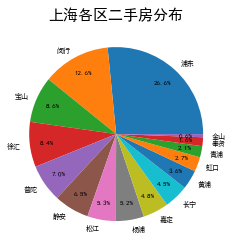

In [25]:
#画出二手房所属区域的饼图
plt.rcParams['font.sans-serif']=['SimHei']#解决中文乱码问题
plt.rcParams["font.size"]=7#设置字体大小
plt.title('上海各区二手房分布',fontsize=15)
labels=['浦东', '闵行', '宝山', '徐汇', '普陀', '静安', '松江', '杨浦', '嘉定', '长宁', '黄浦', '虹口','青浦', '奉贤', '金山']
sizes=[774, 367, 250, 244, 204, 190, 154, 152, 139, 131, 104, 79, 60,48, 17]#每块饼图对应的数值
autopct='%.1f%%'#数值设置为保留两位小数的百分数
plt.pie(sizes,labels=labels,autopct=autopct,shadow=False, pctdistance=0.8)
plt.savefig('pics/district.png',dpi=700)

In [26]:
#对房屋总价分布区间进行可视化分析
house_data['total_price'].max()

6199.0

In [27]:
house_data['total_price'].min()

79.0

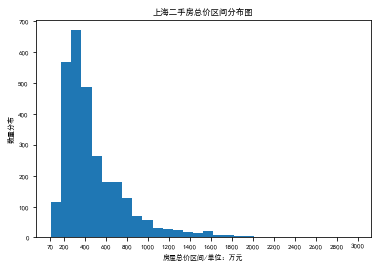

In [28]:
total_price=house_data['total_price']
total_price=total_price[total_price<=3000]#过滤异常值
total_price.hist(bins=30,grid=False)
plt.title('上海二手房总价区间分布图')
plt.xlabel('房屋总价区间/单位：万元')
plt.ylabel('数量分布')
plt.xticks([70,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000])
plt.savefig('pics/total_price.png',dpi=800)

In [29]:
#计算离散化后不同总价区间的房屋数量
total_price=house_data['total_price']
total_price_cut=pd.cut(total_price,bins=[70,100,500,1000,2000,3000,4000,7000]).value_counts()

In [30]:
total_price_cut

(100, 500]      1949
(500, 1000]      756
(1000, 2000]     179
(2000, 3000]      18
(3000, 4000]       5
(4000, 7000]       4
(70, 100]          2
Name: total_price, dtype: int64

In [31]:
total_price_db=DataFrame(total_price_cut)
total_price_db=total_price_db.T
total_price_db

,"(100, 500]","(500, 1000]","(1000, 2000]","(2000, 3000]","(3000, 4000]","(4000, 7000]","(70, 100]"
total_price,1949,756,179,18,5,4,2


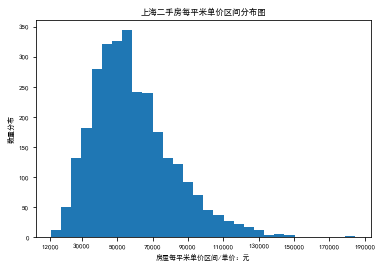

In [32]:
#对房屋单价分布区间进行可视化分析
price=house_data['price']
price.hist(bins=30,grid=False)
plt.title('上海二手房每平米单价区间分布图')
plt.xlabel('房屋每平米单价区间/单价：元')
plt.ylabel('数量分布')
plt.xticks([12000,30000,50000,70000,90000,110000,130000,150000,170000,190000])
plt.savefig('pics/price.png',dpi=800)

In [33]:
#计算离散化后不同单价区间的房屋数量
price.min()

12575

In [34]:
price.max()

184751

In [35]:
price_cut=pd.cut(price,bins=[12000,30000,50000,70000,90000,110000,130000,150000,170000,190000]).value_counts()

In [36]:
price_db=DataFrame(price_cut)

In [37]:
price_db=price_db.T
price_db

,"(50000, 70000]","(30000, 50000]","(70000, 90000]","(12000, 30000]","(90000, 110000]","(110000, 130000]","(130000, 150000]","(150000, 170000]","(170000, 190000]"
price,991,945,486,201,193,73,19,3,2


In [38]:
#对房屋面积进行可视化分析
house_area=house_data['house_area']

In [39]:
house_area.min()

17.05

In [40]:
house_area.max()

471.37

In [41]:
house_area_cut=pd.cut(house_area,bins=[15,30,50,100,150,200,250,500]).value_counts()

In [42]:
house_area_cut

(50, 100]     1773
(100, 150]     574
(30, 50]       430
(150, 200]      84
(15, 30]        20
(200, 250]      19
(250, 500]      13
Name: house_area, dtype: int64

In [43]:
house_area_cut.index

CategoricalIndex([(50, 100], (100, 150], (30, 50], (150, 200], (15, 30],
                  (200, 250], (250, 500]],
                 categories=[(15, 30], (30, 50], (50, 100], (100, 150], (150, 200], (200, 250], (250, 500]], ordered=True, dtype='category')

In [44]:
house_area_cut.values

array([1773,  574,  430,   84,   20,   19,   13], dtype=int64)

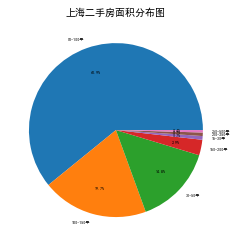

In [45]:
#做出饼图
sizes=[1773,574,430,84,20,19,13]
labels=['50-100平','100-150平','30-50平','150-200平','15-30平','200-250平','250-500平']
plt.rcParams["font.size"]=4#设置字体大小
plt.pie(sizes,labels=labels,autopct='%.1f%%',shadow=False,pctdistance=0.7,labeldistance=1.1)
plt.title('上海二手房面积分布图',fontsize=10)
plt.savefig('pics/area.png',dpi=800)


In [46]:
#对户型结构house_struc进行可视化分析
house_struc=house_data['house_struc']
house_struc.value_counts()
house_struc[house_struc!=1].sum()

206

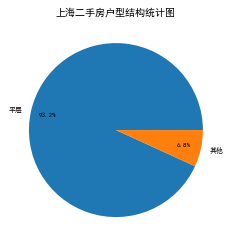

In [47]:
#做出饼图
sizes=[2813,206]
labels=['平层','其他']
plt.rcParams["font.size"]=7
plt.pie(sizes,labels=labels,autopct='%.1f%%',shadow=False,pctdistance=0.8)
plt.title('上海二手房户型结构统计图',fontsize=10)
plt.savefig('pics/house_struc.png',dpi=800)

In [48]:
#对archi_cate建筑类型进行可视化分析
archi_cate=house_data['archi_cate']
archi_cate.value_counts()


1    2657
2     226
3      24
0       5
4       1
Name: archi_cate, dtype: int64

In [49]:
archi_cate.value_counts()[2:].sum()

30

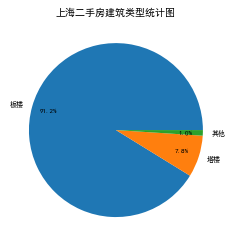

In [50]:
sizes=[2657,226,30]
labels=['板楼','塔楼','其他']
plt.pie(sizes,labels=labels,autopct='%.1f%%',pctdistance=0.8,shadow=False)
plt.title('上海二手房建筑类型统计图',fontsize=10)
plt.savefig('pics/archi_cate.png',dpi=800)

In [51]:
house_data.head()

,title,name,district,total_price,price,house_type,floor_loc,house_area,house_struc,archi_cate,house_toward,archi_struc,deco_condition,elevator_rate,elevator_equip
0,新上房源 精装修 不靠高架 近地铁一号线 诚意出售,花苑村玉兰园二手房,徐汇,220.0,56981,1室1厅1厨1卫,高楼层 (共6层),38.61,1,1,南,1,1,一梯四户,0
1,售后公房，满五唯一，南北通全明户型，小区中间，求知,龙吴路13弄二手房,徐汇,382.0,63287,2室1厅1厨1卫,低楼层 (共6层),60.36,1,1,西南,1,2,一梯四户,0
2,南北通飞机户型，满五唯一精装修 ，一梯二户高得房率,虹叶茗园二手房,虹口,978.0,84852,2室2厅1厨2卫,低楼层 (共22层),115.26,1,1,南,2,1,一梯两户,1
3,高层电梯房、户型正气、精装修、无增值税、诚意出售,清涧三街坊二手房,普陀,360.0,45329,2室1厅1厨1卫,中楼层 (共24层),79.42,1,2,南 北,2,1,两梯八户,1
4,95年房龄+地铁口+精装修+边套全明+满五唯一+红旗,纪念小区二手房,虹口,420.0,51458,2室1厅1厨1卫,低楼层 (共6层),81.62,1,1,南 北,1,1,一梯四户,0


In [52]:
#对archi_struc建筑结构进行统计
archi_struc=house_data['archi_struc']
archi_struc.value_counts()

2    1847
1    1042
3      13
0       5
4       4
5       2
Name: archi_struc, dtype: int64

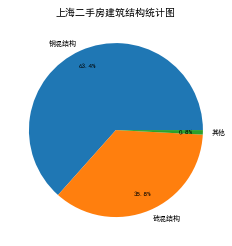

In [53]:
sizes=[1847,1042,24]
labels=['钢混结构','砖混结构','其他']
plt.pie(sizes,labels=labels,autopct='%.1f%%',shadow=False,pctdistance=0.8)
plt.title('上海二手房建筑结构统计图',fontsize=10)
plt.savefig('pics/archi_struc.png',dpi=800)

In [54]:
#对deco_condition装修情况进行统计
deco_condition=house_data['deco_condition']
deco_condition.value_counts()

1    1631
2    1037
3     199
0      46
Name: deco_condition, dtype: int64

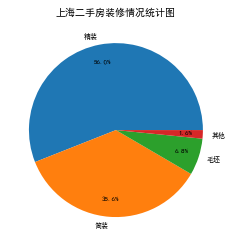

In [55]:
sizes=[1631,1037,199,46]
#设置其他为0，精装为1，简装为2，毛坯为3
labels=['精装','简装','毛坯','其他']
plt.pie(sizes,labels=labels,autopct='%.1f%%',shadow=False,pctdistance=0.8)
plt.title('上海二手房装修情况统计图',fontsize=10)
plt.savefig('pics/deco.png',dpi=800)

In [56]:
#对elevator_equip是否配备电梯进行统计
elevator_equip=house_data['elevator_equip']
elevator_equip.value_counts()
#设置1为有，0为无，3为暂无数据

0    1508
1    1376
3      29
Name: elevator_equip, dtype: int64

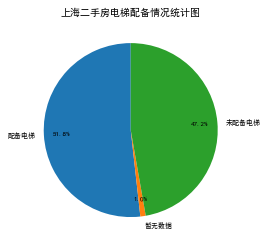

In [57]:
sizes=[1508,29,1376]
labels=['配备电梯','暂无数据','未配备电梯']
plt.pie(sizes,labels=labels,autopct='%.1f%%',shadow=False,pctdistance=0.8,startangle=90)
plt.title('上海二手房电梯配备情况统计图',fontsize=10)
plt.savefig('pics/elevator.png',dpi=800)

In [58]:
house_data['title'].values

array(['新上房源 精装修 不靠高架 近地铁一号线 诚意出售', '售后公房，满五唯一，南北通全明户型，小区中间，求知',
       '南北通飞机户型，满五唯一精装修 ，一梯二户高得房率', ..., '诚心卖双南两房 满五唯一 配套齐全 交通便利',
       '文华苑，2室一厅，精装，交通便利，飞机户型', '带产权车位 南北通透 户型方正 业主诚意出售'], dtype=object)

In [59]:
#各区房价分析
price_district=house_data['price'].groupby(house_data['district']).mean()#各区平均房价

In [60]:
type(price_district)

pandas.core.series.Series

In [61]:
#对price_district的value值取整
obj=Series()
for k,v in zip(price_district.index,price_district.values):
    #print(k)
    #print(v)
    obj[k]=int(v)
    
#price_district

D:\application_setup\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [62]:
price_district=obj
price_district

嘉定    39294
奉贤    23722
宝山    45288
徐汇    77769
普陀    61850
杨浦    66350
松江    35759
浦东    59884
虹口    67315
金山    20214
长宁    67910
闵行    52443
青浦    31688
静安    77927
黄浦    94359
dtype: int64

In [63]:
price_district=price_district.sort_values(ascending=False)#对房价做降序排列

In [64]:
price_district

黄浦    94359
静安    77927
徐汇    77769
长宁    67910
虹口    67315
杨浦    66350
普陀    61850
浦东    59884
闵行    52443
宝山    45288
嘉定    39294
松江    35759
青浦    31688
奉贤    23722
金山    20214
dtype: int64

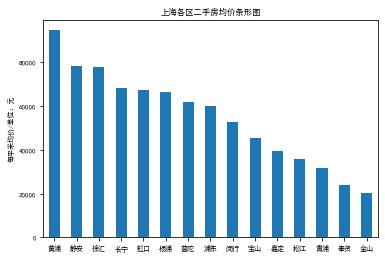

In [65]:
#做出柱状图
price_district.plot(kind='bar',rot=0)
plt.title('上海各区二手房均价条形图')
plt.ylabel('每平米均价/单位：元')
plt.savefig('pics/pri_dist.png',dpi=800)


In [67]:
#各区二手房面积分析
area_district=house_data['house_area'].groupby(house_data['district']).mean()

In [68]:
area_district

district
嘉定     83.542302
奉贤     84.448542
宝山     81.086000
徐汇     77.545287
普陀     78.706814
杨浦     74.265724
松江     91.387857
浦东     82.058902
虹口     82.458481
金山    107.695294
长宁     76.020992
闵行     90.381281
青浦     93.579333
静安     83.310158
黄浦     88.749712
Name: house_area, dtype: float64

In [69]:
obj=Series()
for k,v in zip(area_district.index,area_district.values):
    obj[k]=int(v)

D:\application_setup\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [71]:
area_district=obj.sort_values(ascending=False)

In [72]:
area_district

金山    107
青浦     93
松江     91
闵行     90
黄浦     88
奉贤     84
静安     83
嘉定     83
虹口     82
浦东     82
宝山     81
普陀     78
徐汇     77
长宁     76
杨浦     74
dtype: int64

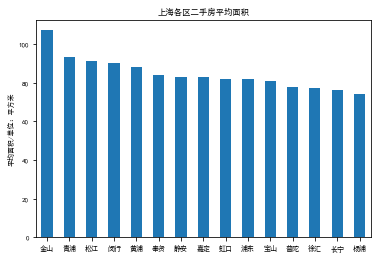

In [76]:
area_district.plot(kind='bar',rot=0)
plt.title('上海各区二手房平均面积')
plt.ylabel('平均面积/单位：平方米')
plt.savefig('pics/area_dist.png',dpi=800)
